In [57]:
# try to mount google colab
import os
try:
  from google.colab import drive
  drive.mount('/content/drive')
  cur_dir = "/content/drive/MyDrive/UEH_Group08_Horse Colic_Final/preprocessing"
except:
  cur_dir = "."
  pass
cur_dir = os.path.abspath(cur_dir)
os.chdir(cur_dir)

print(f'cur_dir: {cur_dir} \n --> {os.path.abspath(".")}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cur_dir: /content/drive/MyDrive/UEH_Group08_Horse Colic_Final/preprocessing 
 --> /content/drive/MyDrive/UEH_Group08_Horse Colic_Final/preprocessing


In [58]:

import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

In [59]:
# params
seed = 42  # random seed để tái dựng lại thực nghiệm giống nhau

exps_dir = "../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)

In [60]:
data_path = "../data/horse-colic.csv"
data_names = [
    'Surgery', 'Age', 'Hospital ID', 'rectal temperature', 'pulse', 'respiratory rate',
    'temperature of extremities', 'peripheral pulse', 'mucous membranes', 'capillary refill time',
    'pain', 'peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux',
    'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume',
    'total protein', 'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome',
    'surgical lesion?', 'lesion type 1', 'lesion type 2', 'lesion type 3', 'cp_data'
]

# Định nghĩa kiểu dữ liệu của các cột
dtype = {
    'lesion type 1': str,
    'lesion type 2': str,
    'lesion type 3': str
}

# Đọc dữ liệu từ file CSV
df_dataset = pd.read_csv(data_path, names=data_names, na_values='?', dtype=dtype)


In [61]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Surgery                      299 non-null    float64
 1   Age                          300 non-null    int64  
 2   Hospital ID                  300 non-null    int64  
 3   rectal temperature           240 non-null    float64
 4   pulse                        276 non-null    float64
 5   respiratory rate             242 non-null    float64
 6   temperature of extremities   244 non-null    float64
 7   peripheral pulse             231 non-null    float64
 8   mucous membranes             253 non-null    float64
 9   capillary refill time        268 non-null    float64
 10  pain                         245 non-null    float64
 11  peristalsis                  256 non-null    float64
 12  abdominal distension         244 non-null    float64
 13  nasogastric tube    

### Chia dữ liệu thực nghiệm

In [62]:
index_all = np.arange(300)
index_train, index_test = train_test_split(index_all, test_size = 0.3, random_state=seed)

In [63]:
df_train = df_dataset.iloc[index_train]
df_test  = df_dataset.iloc[index_test]
print(f'train: {len(df_train)} / test: {len(df_test)} - Tỷ lệ: {len(df_train) / len(df_dataset)}, {len(df_test) / len(df_dataset)}')

train: 210 / test: 90 - Tỷ lệ: 0.7, 0.3


In [64]:
# Lưu dữ liệu sau khi chia
df_train.to_excel(f'{exps_dir}/data/train.xlsx', index=None)
df_test.to_excel(f'{exps_dir}/data/test.xlsx', index=None)
np.savez(f'{exps_dir}/data/idx.npz', id_train = index_train, id_test = index_test)

In [65]:
 #Kiểm tra lại
dict(np.load(f'{exps_dir}/data/idx.npz'))

{'id_train': array([194, 101,  68, 224,  37,  16, 179, 147, 274,  67, 228,  69,  31,
        183, 265, 225, 140,  18, 181,  96, 132, 262,  86, 248, 245, 116,
        146, 292, 197, 206,  55, 172, 184, 167, 139, 253,  38, 125, 195,
        283, 137, 112, 168, 117, 277, 271, 155, 176, 178,   2, 115, 143,
        177, 120, 210, 260, 127,  74,  29,  83, 269, 107, 223, 158, 280,
        246, 222,  65, 198,  85, 213, 159,  12,  35,  28, 142, 284, 254,
        170,  51,  95, 208, 247,  41,  89, 244, 136,  26, 293, 141, 200,
          0, 268, 272, 100, 259, 255, 171,  98,  36,  61, 150, 236, 202,
        242,  11, 296, 267,  27, 219,   4, 122,  32, 204, 162, 209, 285,
        138,  62, 135, 128, 290,   8,  70, 264,  64,  44, 279, 156,  40,
        123, 275, 216, 153,  23, 261, 110,  81, 207, 212,  39, 240, 291,
        258, 199,  14,  47,  94, 263, 227, 273, 201, 161,  43, 217, 145,
        190, 220, 251,   3, 105,  53, 133,   1, 131, 103,  49,  80, 205,
         34,  91,  52, 241,  13,  88, 1

In [66]:
pd.read_excel(f'{exps_dir}/data/train.xlsx')

,Surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,lesion type 1,lesion type 2,lesion type 3,cp_data
0,2.0,1,534163,37.9,88.0,24.0,1.0,1.0,2.0,1.0,...,37.0,56.0,NaN,NaN,1.0,2,0,0,0,2
1,1.0,1,534899,NaN,60.0,20.0,4.0,3.0,4.0,2.0,...,NaN,NaN,NaN,NaN,3.0,1,3205,0,0,2
2,2.0,1,529777,NaN,52.0,16.0,1.0,NaN,3.0,1.0,...,55.0,7.2,NaN,NaN,1.0,2,2124,0,0,2
3,1.0,1,535392,38.8,50.0,14.0,1.0,1.0,1.0,1.0,...,38.0,58.0,NaN,NaN,1.0,1,3111,0,0,2
4,1.0,1,533847,37.8,72.0,NaN,NaN,3.0,NaN,1.0,...,56.0,80.0,1.0,2.0,1.0,1,3111,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,1,533887,38.5,60.0,NaN,1.0,1.0,NaN,1.0,...,33.0,53.0,1.0,NaN,1.0,1,4111,0,0,2
206,1.0,1,529424,37.8,48.0,28.0,1.0,1.0,1.0,1.0,...,46.0,5.9,2.0,7.0,1.0,2,0,0,0,1
207,1.0,1,528668,38.3,52.0,96.0,NaN,3.0,3.0,1.0,...,43.0,6.1,NaN,NaN,1.0,1,3209,0,0,1
208,1.0,1,528570,37.5,60.0,50.0,3.0,3.0,1.0,1.0,...,35.0,6.5,NaN,NaN,2.0,1,2209,0,0,2


In [67]:

pd.read_excel(f'{exps_dir}/data/train.xlsx')


,Surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,lesion type 1,lesion type 2,lesion type 3,cp_data
0,2.0,1,534163,37.9,88.0,24.0,1.0,1.0,2.0,1.0,...,37.0,56.0,NaN,NaN,1.0,2,0,0,0,2
1,1.0,1,534899,NaN,60.0,20.0,4.0,3.0,4.0,2.0,...,NaN,NaN,NaN,NaN,3.0,1,3205,0,0,2
2,2.0,1,529777,NaN,52.0,16.0,1.0,NaN,3.0,1.0,...,55.0,7.2,NaN,NaN,1.0,2,2124,0,0,2
3,1.0,1,535392,38.8,50.0,14.0,1.0,1.0,1.0,1.0,...,38.0,58.0,NaN,NaN,1.0,1,3111,0,0,2
4,1.0,1,533847,37.8,72.0,NaN,NaN,3.0,NaN,1.0,...,56.0,80.0,1.0,2.0,1.0,1,3111,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,1,533887,38.5,60.0,NaN,1.0,1.0,NaN,1.0,...,33.0,53.0,1.0,NaN,1.0,1,4111,0,0,2
206,1.0,1,529424,37.8,48.0,28.0,1.0,1.0,1.0,1.0,...,46.0,5.9,2.0,7.0,1.0,2,0,0,0,1
207,1.0,1,528668,38.3,52.0,96.0,NaN,3.0,3.0,1.0,...,43.0,6.1,NaN,NaN,1.0,1,3209,0,0,1
208,1.0,1,528570,37.5,60.0,50.0,3.0,3.0,1.0,1.0,...,35.0,6.5,NaN,NaN,2.0,1,2209,0,0,2


## **Tiền xử lý dữ liệu**

Dựa trên những đánh giá, phân tích ở phần EDA, chúng ta sẽ tiến hành các bước chuẩn bị dữ liệu cho các mô hình học máy.

## Làm sạch dữ liệu

### Tạo bảng dữ liệu làm sạch
- Chỉ giữ lại input, output

In [68]:
dtype = {
    'lesion type 1': str,
    'lesion type 2': str,
    'lesion type 3': str}
df_train = pd.read_excel(f'{exps_dir}/data/train.xlsx',dtype = dtype)
display.display(df_train)

,Surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,lesion type 1,lesion type 2,lesion type 3,cp_data
0,2.0,1,534163,37.9,88.0,24.0,1.0,1.0,2.0,1.0,...,37.0,56.0,NaN,NaN,1.0,2,00000,00000,00000,2
1,1.0,1,534899,NaN,60.0,20.0,4.0,3.0,4.0,2.0,...,NaN,NaN,NaN,NaN,3.0,1,03205,00000,00000,2
2,2.0,1,529777,NaN,52.0,16.0,1.0,NaN,3.0,1.0,...,55.0,7.2,NaN,NaN,1.0,2,02124,00000,00000,2
3,1.0,1,535392,38.8,50.0,14.0,1.0,1.0,1.0,1.0,...,38.0,58.0,NaN,NaN,1.0,1,03111,00000,00000,2
4,1.0,1,533847,37.8,72.0,NaN,NaN,3.0,NaN,1.0,...,56.0,80.0,1.0,2.0,1.0,1,03111,00000,00000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,1,533887,38.5,60.0,NaN,1.0,1.0,NaN,1.0,...,33.0,53.0,1.0,NaN,1.0,1,04111,00000,00000,2
206,1.0,1,529424,37.8,48.0,28.0,1.0,1.0,1.0,1.0,...,46.0,5.9,2.0,7.0,1.0,2,00000,00000,00000,1
207,1.0,1,528668,38.3,52.0,96.0,NaN,3.0,3.0,1.0,...,43.0,6.1,NaN,NaN,1.0,1,03209,00000,00000,1
208,1.0,1,528570,37.5,60.0,50.0,3.0,3.0,1.0,1.0,...,35.0,6.5,NaN,NaN,2.0,1,02209,00000,00000,2


### Loại bỏ các cột dữ liệu

In [69]:
#replace the value 9 to 2 in the age column

df_train["Age"]=df_train["Age"].replace(to_replace=9,value=2)


In [70]:
class ColumnDropperTransformer:
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

columnDropper = ColumnDropperTransformer(['Hospital ID','nasogastric reflux PH', 'abdomcentesis total protein', 'abdominocentesis appearance',
                                          'surgical lesion?', 'cp_data', "lesion type 2","lesion type 3"
                                          ])

df_train = columnDropper.transform(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Surgery                     209 non-null    float64
 1   Age                         210 non-null    int64  
 2   rectal temperature          165 non-null    float64
 3   pulse                       194 non-null    float64
 4   respiratory rate            175 non-null    float64
 5   temperature of extremities  169 non-null    float64
 6   peripheral pulse            164 non-null    float64
 7   mucous membranes            178 non-null    float64
 8   capillary refill time       190 non-null    float64
 9   pain                        174 non-null    float64
 10  peristalsis                 178 non-null    float64
 11  abdominal distension        171 non-null    float64
 12  nasogastric tube            139 non-null    float64
 13  nasogastric reflux          133 non

In [ ]:
#splitting the values of the column (type of lesion) into 5 columns
df_train[['site of lesion','type','subtype','specific code','none']]=df_train['lesion type 1'].astype(str).apply(lambda x: pd.Series(list(x))).astype(float)

In [ ]:
df_train.drop('lesion type 1', axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Surgery                     209 non-null    float64
 1   Age                         210 non-null    int64  
 2   rectal temperature          165 non-null    float64
 3   pulse                       194 non-null    float64
 4   respiratory rate            175 non-null    float64
 5   temperature of extremities  169 non-null    float64
 6   peripheral pulse            164 non-null    float64
 7   mucous membranes            178 non-null    float64
 8   capillary refill time       190 non-null    float64
 9   pain                        174 non-null    float64
 10  peristalsis                 178 non-null    float64
 11  abdominal distension        171 non-null    float64
 12  nasogastric tube            139 non-null    float64
 13  nasogastric reflux          133 non

In [ ]:
class RowDropperTransformer:
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.dropna(subset = self.columns)

    def fit(self, X, y=None):
        return self

rowDropper = RowDropperTransformer(['Surgery', 'outcome'])
df_train = rowDropper.transform(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 209
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Surgery                     209 non-null    float64
 1   Age                         209 non-null    int64  
 2   rectal temperature          164 non-null    float64
 3   pulse                       193 non-null    float64
 4   respiratory rate            174 non-null    float64
 5   temperature of extremities  168 non-null    float64
 6   peripheral pulse            163 non-null    float64
 7   mucous membranes            177 non-null    float64
 8   capillary refill time       189 non-null    float64
 9   pain                        173 non-null    float64
 10  peristalsis                 177 non-null    float64
 11  abdominal distension        170 non-null    float64
 12  nasogastric tube            138 non-null    float64
 13  nasogastric reflux          132 non

### **Filling Missing (Điền giá trị bị khuyết)**
Trong bước này, chúng tôi sẽ sử dụng các cách sau để điền dữ liệu vào các ô bị khuyết:
- Điền vào các ô bị khuyết giá trị **mean** hoặc **median** cho các biến liên tục.
- Điền vào các ô bị khuyết giá trị **mode** cho các biến rời rạc.
- kNN

In [ ]:
from sklearn.compose import ColumnTransformer

class CustomColumnTransformer:
    def __init__(self, transformations, remainder="passthrough", names_mapper = lambda x: x):
        self.transformations=transformations
        self.remainder = remainder
        self.names_mapper = names_mapper #it will be useful in later CustomColumnTransformer usage

    def transform(self,X,y=None):
        ct =  ColumnTransformer(self.transformations, remainder=self.remainder).set_output(transform="pandas")
        result = ct.fit_transform(X)
        #Result columns names are determined by "{transformation_name}__{original_column_name}", so we need to delete this first part.
        result.columns = [self.names_mapper(name[name.index('__')+2:]) for name in ct.get_feature_names_out()]
        return result

    def fit(self, X, y=None):
        return self

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

#these columns will be imputed with a mean

continuousColumns = ['rectal temperature', 'pulse', 'respiratory rate', 'packed cell volume', 'total protein', ]
#these columns will be imputed with a median
discreteColumns = ['temperature of extremities','peripheral pulse','mucous membranes', 'capillary refill time', 'pain', 'peristalsis', 'nasogastric tube', 'nasogastric reflux', 'rectal examination - feces', 'abdomen', ]
#this column will be imputed with a KNN because its marked as an important parameter
knnColumns = ['abdominal distension']

fillNaTransformer = CustomColumnTransformer([
    ('fillWithMean', SimpleImputer(strategy='mean'), continuousColumns),
    ('fillWithMedian', SimpleImputer(strategy="most_frequent"), discreteColumns),
    ('fillWithKnn', KNNImputer(n_neighbors=3), knnColumns)
])

df_train = fillNaTransformer.transform(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 209
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rectal temperature          209 non-null    float64
 1   pulse                       209 non-null    float64
 2   respiratory rate            209 non-null    float64
 3   packed cell volume          209 non-null    float64
 4   total protein               209 non-null    float64
 5   temperature of extremities  209 non-null    float64
 6   peripheral pulse            209 non-null    float64
 7   mucous membranes            209 non-null    float64
 8   capillary refill time       209 non-null    float64
 9   pain                        209 non-null    float64
 10  peristalsis                 209 non-null    float64
 11  nasogastric tube            209 non-null    float64
 12  nasogastric reflux          209 non-null    float64
 13  rectal examination - feces  209 non

In [ ]:
df_train.head(50)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,abdomen,abdominal distension,Surgery,Age,outcome,site of lesion,type,subtype,specific code,none
0,37.900000,88.000000,24.000000,37.00000,56.000000,1.0,1.0,2.0,1.0,2.0,...,1.0,1.000000,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0
1,38.171341,60.000000,20.000000,45.37037,23.133155,4.0,3.0,4.0,2.0,5.0,...,5.0,2.252941,1.0,1,3.0,0.0,3.0,2.0,0.0,5.0
2,38.171341,52.000000,16.000000,55.00000,7.200000,1.0,1.0,3.0,1.0,3.0,...,5.0,2.252941,2.0,1,1.0,0.0,2.0,1.0,2.0,4.0
3,38.800000,50.000000,14.000000,38.00000,58.000000,1.0,1.0,1.0,1.0,3.0,...,5.0,1.000000,1.0,1,1.0,0.0,3.0,1.0,1.0,1.0
4,37.800000,72.000000,30.293103,56.00000,80.000000,3.0,3.0,1.0,1.0,5.0,...,1.0,1.000000,1.0,1,1.0,0.0,3.0,1.0,1.0,1.0
5,38.171341,128.000000,36.000000,53.00000,7.800000,3.0,3.0,4.0,2.0,4.0,...,5.0,3.000000,1.0,2,2.0,0.0,1.0,4.0,0.0,0.0
6,38.500000,100.000000,30.293103,45.37037,23.133155,3.0,3.0,5.0,2.0,4.0,...,5.0,4.000000,2.0,1,3.0,0.0,1.0,1.0,1.0,1.0
7,38.000000,44.000000,12.000000,33.00000,6.500000,2.0,1.0,3.0,1.0,3.0,...,4.0,3.000000,2.0,1,2.0,0.0,2.0,2.0,0.0,9.0
8,38.171341,76.000000,30.293103,45.37037,23.133155,3.0,3.0,1.0,1.0,3.0,...,5.0,4.000000,1.0,1,3.0,1.0,1.0,1.0,2.0,4.0
9,38.400000,54.000000,24.000000,49.00000,7.200000,1.0,1.0,1.0,1.0,1.0,...,2.0,1.000000,2.0,1,1.0,0.0,3.0,1.0,1.0,1.0


###SMOTE

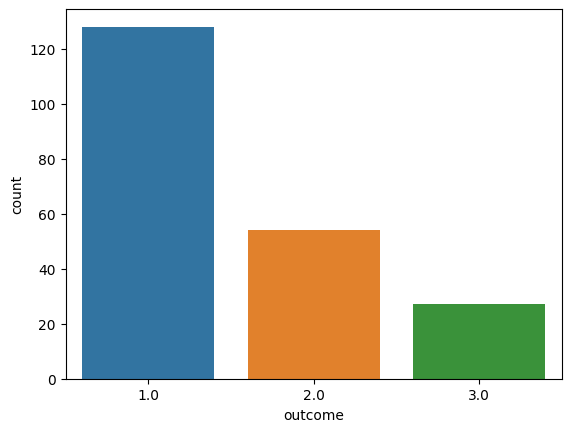

In [ ]:
#Lớp outcome trước khi cân bằng
sns.countplot(x = df_train['outcome']);


In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_train.drop(columns=['outcome'])
y = df_train['outcome']



# Khởi tạo và áp dụng SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
#smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lưu kết quả vào df_train_cp
df_train = pd.DataFrame(X_resampled, columns=X.columns)
df_train['outcome'] = y_resampled

# In ra số lượng mẫu của mỗi lớp sau khi áp dụng SMOTE
counter = Counter(y_resampled)
print(counter)

Counter({1.0: 128, 3.0: 128, 2.0: 128})


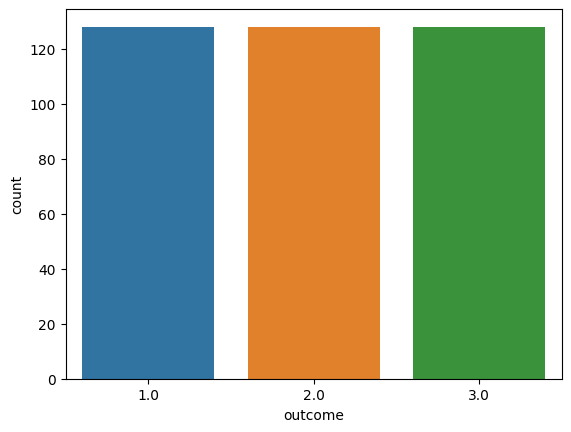

In [ ]:
# Lớp outcome sau cân bằng
sns.countplot(x = df_train['outcome']);


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rectal temperature          384 non-null    float64
 1   pulse                       384 non-null    float64
 2   respiratory rate            384 non-null    float64
 3   packed cell volume          384 non-null    float64
 4   total protein               384 non-null    float64
 5   temperature of extremities  384 non-null    float64
 6   peripheral pulse            384 non-null    float64
 7   mucous membranes            384 non-null    float64
 8   capillary refill time       384 non-null    float64
 9   pain                        384 non-null    float64
 10  peristalsis                 384 non-null    float64
 11  nasogastric tube            384 non-null    float64
 12  nasogastric reflux          384 non-null    float64
 13  rectal examination - feces  384 non

#### Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [ ]:
# Class: LabelEncoder
class_encoder = LabelEncoder()
class_encoder.fit(df_train["outcome"])
class_names = class_encoder.classes_
print(class_names)

# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

# Load and check again
print(joblib.load(f'{save_dir}/class_encoder.joblib').classes_)

[1. 2. 3.]
[1. 2. 3.]


In [ ]:
class_encoder.transform(df_train["outcome"])

array([0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0,
       0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
df_train["outcome"] = class_encoder.transform(df_train["outcome"])
display.display(df_train)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,abdomen,abdominal distension,Surgery,Age,site of lesion,type,subtype,specific code,none,outcome
0,37.900000,88.000000,24.000000,37.000000,56.000000,1.000000,1.000000,2.000000,1.0,2.000000,...,1.000000,1.000000,2.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0
1,38.171341,60.000000,20.000000,45.370370,23.133155,4.000000,3.000000,4.000000,2.0,5.000000,...,5.000000,2.252941,1.000000,1,0.0,3.000000,2.000000,0.000000,5.000000,2
2,38.171341,52.000000,16.000000,55.000000,7.200000,1.000000,1.000000,3.000000,1.0,3.000000,...,5.000000,2.252941,2.000000,1,0.0,2.000000,1.000000,2.000000,4.000000,0
3,38.800000,50.000000,14.000000,38.000000,58.000000,1.000000,1.000000,1.000000,1.0,3.000000,...,5.000000,1.000000,1.000000,1,0.0,3.000000,1.000000,1.000000,1.000000,0
4,37.800000,72.000000,30.293103,56.000000,80.000000,3.000000,3.000000,1.000000,1.0,5.000000,...,1.000000,1.000000,1.000000,1,0.0,3.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,38.500000,100.000000,30.293103,45.370370,23.133155,3.000000,3.000000,5.000000,2.0,4.000000,...,5.000000,4.000000,2.000000,1,0.0,2.325120,1.000000,1.441707,2.325120,2
380,37.906109,36.469455,16.469455,36.882636,73.474272,3.000000,1.000000,1.000000,1.0,3.882636,...,4.530545,2.029686,1.000000,1,0.0,3.352091,1.000000,1.000000,1.117364,2
381,38.171341,60.943536,20.754828,45.370370,23.133155,3.811293,2.622586,3.433879,2.0,5.000000,...,5.000000,2.582624,1.000000,1,0.0,3.000000,2.000000,0.000000,5.000000,2
382,38.541866,63.319003,22.870452,45.370370,18.550419,3.721129,3.000000,4.000000,2.0,4.442257,...,5.000000,2.461274,1.278871,1,0.0,3.278871,2.000000,0.000000,5.000000,2


#### Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

In [ ]:
print("class_names: ", class_names)
df_onehot = pd.get_dummies(df_dataset["outcome"])
df_onehot = pd.DataFrame(df_onehot.values, columns=class_names)
display.display(df_onehot)

class_names:  [1. 2. 3.]


,1.0,2.0,3.0
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
295,0,0,1
296,0,0,1
297,0,1,0
298,1,0,0


#### Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [ ]:
df_train

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,abdomen,abdominal distension,Surgery,Age,site of lesion,type,subtype,specific code,none,outcome
0,37.900000,88.000000,24.000000,37.000000,56.000000,1.000000,1.000000,2.000000,1.0,2.000000,...,1.000000,1.000000,2.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0
1,38.171341,60.000000,20.000000,45.370370,23.133155,4.000000,3.000000,4.000000,2.0,5.000000,...,5.000000,2.252941,1.000000,1,0.0,3.000000,2.000000,0.000000,5.000000,2
2,38.171341,52.000000,16.000000,55.000000,7.200000,1.000000,1.000000,3.000000,1.0,3.000000,...,5.000000,2.252941,2.000000,1,0.0,2.000000,1.000000,2.000000,4.000000,0
3,38.800000,50.000000,14.000000,38.000000,58.000000,1.000000,1.000000,1.000000,1.0,3.000000,...,5.000000,1.000000,1.000000,1,0.0,3.000000,1.000000,1.000000,1.000000,0
4,37.800000,72.000000,30.293103,56.000000,80.000000,3.000000,3.000000,1.000000,1.0,5.000000,...,1.000000,1.000000,1.000000,1,0.0,3.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,38.500000,100.000000,30.293103,45.370370,23.133155,3.000000,3.000000,5.000000,2.0,4.000000,...,5.000000,4.000000,2.000000,1,0.0,2.325120,1.000000,1.441707,2.325120,2
380,37.906109,36.469455,16.469455,36.882636,73.474272,3.000000,1.000000,1.000000,1.0,3.882636,...,4.530545,2.029686,1.000000,1,0.0,3.352091,1.000000,1.000000,1.117364,2
381,38.171341,60.943536,20.754828,45.370370,23.133155,3.811293,2.622586,3.433879,2.0,5.000000,...,5.000000,2.582624,1.000000,1,0.0,3.000000,2.000000,0.000000,5.000000,2
382,38.541866,63.319003,22.870452,45.370370,18.550419,3.721129,3.000000,4.000000,2.0,4.442257,...,5.000000,2.461274,1.278871,1,0.0,3.278871,2.000000,0.000000,5.000000,2


##### Min-Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Danh sách các cột cần chuẩn hóa (trừ cột 'outcome')
scale_columns = df_train.columns[df_train.columns != 'outcome'].tolist()

# Khởi tạo MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit MinMaxScaler với dữ liệu từ các cột cần chuẩn hóa
minmax_scaler.fit(df_train[scale_columns])

# Tạo DataFrame mới để lưu trữ kết quả
df_minmax = df_train.copy()

# Áp dụng MinMaxScaler cho các cột được chỉ định
df_minmax[scale_columns] = minmax_scaler.transform(df_train[scale_columns])


In [ ]:
minmax_scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['rectal temperature', 'pulse', 'respiratory rate',
        'packed cell volume', 'total protein',
        'temperature of extremities', 'peripheral pulse',
        'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
        'nasogastric tube', 'nasogastric reflux',
        'rectal examination - feces', 'abdomen', 'abdominal distension',
        'Surgery', 'Age', 'site of lesion', 'type', 'subtype',
        'specific code', 'none'], dtype=object),
 'n_features_in_': 23,
 'n_samples_seen_': 384,
 'scale_': array([0.18518519, 0.00649351, 0.01136364, 0.01923077, 0.01166861,
        0.33333333, 0.33333333, 0.2       , 0.5       , 0.25      ,
        0.33333333, 0.5       , 0.5       , 0.33333333, 0.25      ,
        0.33333333, 1.        , 1.        , 0.25      , 0.11111111,
        0.25      , 0.33333333, 0.11111111]),
 'min_': array([-6.55555556, -0.19480519, -0.09090909, -0.44230769, -0.

In [ ]:
# Save encoders
joblib.dump(minmax_scaler, f'{save_dir}/minmax_scaler.joblib')

['../exps/feature1/minmax_scaler.joblib']

In [ ]:
joblib.load(f'{save_dir}/minmax_scaler.joblib').__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['rectal temperature', 'pulse', 'respiratory rate',
        'packed cell volume', 'total protein',
        'temperature of extremities', 'peripheral pulse',
        'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
        'nasogastric tube', 'nasogastric reflux',
        'rectal examination - feces', 'abdomen', 'abdominal distension',
        'Surgery', 'Age', 'site of lesion', 'type', 'subtype',
        'specific code', 'none'], dtype=object),
 'n_features_in_': 23,
 'n_samples_seen_': 384,
 'scale_': array([0.18518519, 0.00649351, 0.01136364, 0.01923077, 0.01166861,
        0.33333333, 0.33333333, 0.2       , 0.5       , 0.25      ,
        0.33333333, 0.5       , 0.5       , 0.33333333, 0.25      ,
        0.33333333, 1.        , 1.        , 0.25      , 0.11111111,
        0.25      , 0.33333333, 0.11111111]),
 'min_': array([-6.55555556, -0.19480519, -0.09090909, -0.44230769, -0.

In [ ]:
# save scale_columns
np.savez(f'{save_dir}/scale_columns.npz', scale_columns = scale_columns)
dict(np.load(f'{save_dir}/scale_columns.npz'))

{'scale_columns': array(['rectal temperature', 'pulse', 'respiratory rate',
        'packed cell volume', 'total protein',
        'temperature of extremities', 'peripheral pulse',
        'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
        'nasogastric tube', 'nasogastric reflux',
        'rectal examination - feces', 'abdomen', 'abdominal distension',
        'Surgery', 'Age', 'site of lesion', 'type', 'subtype',
        'specific code', 'none'], dtype='<U26')}

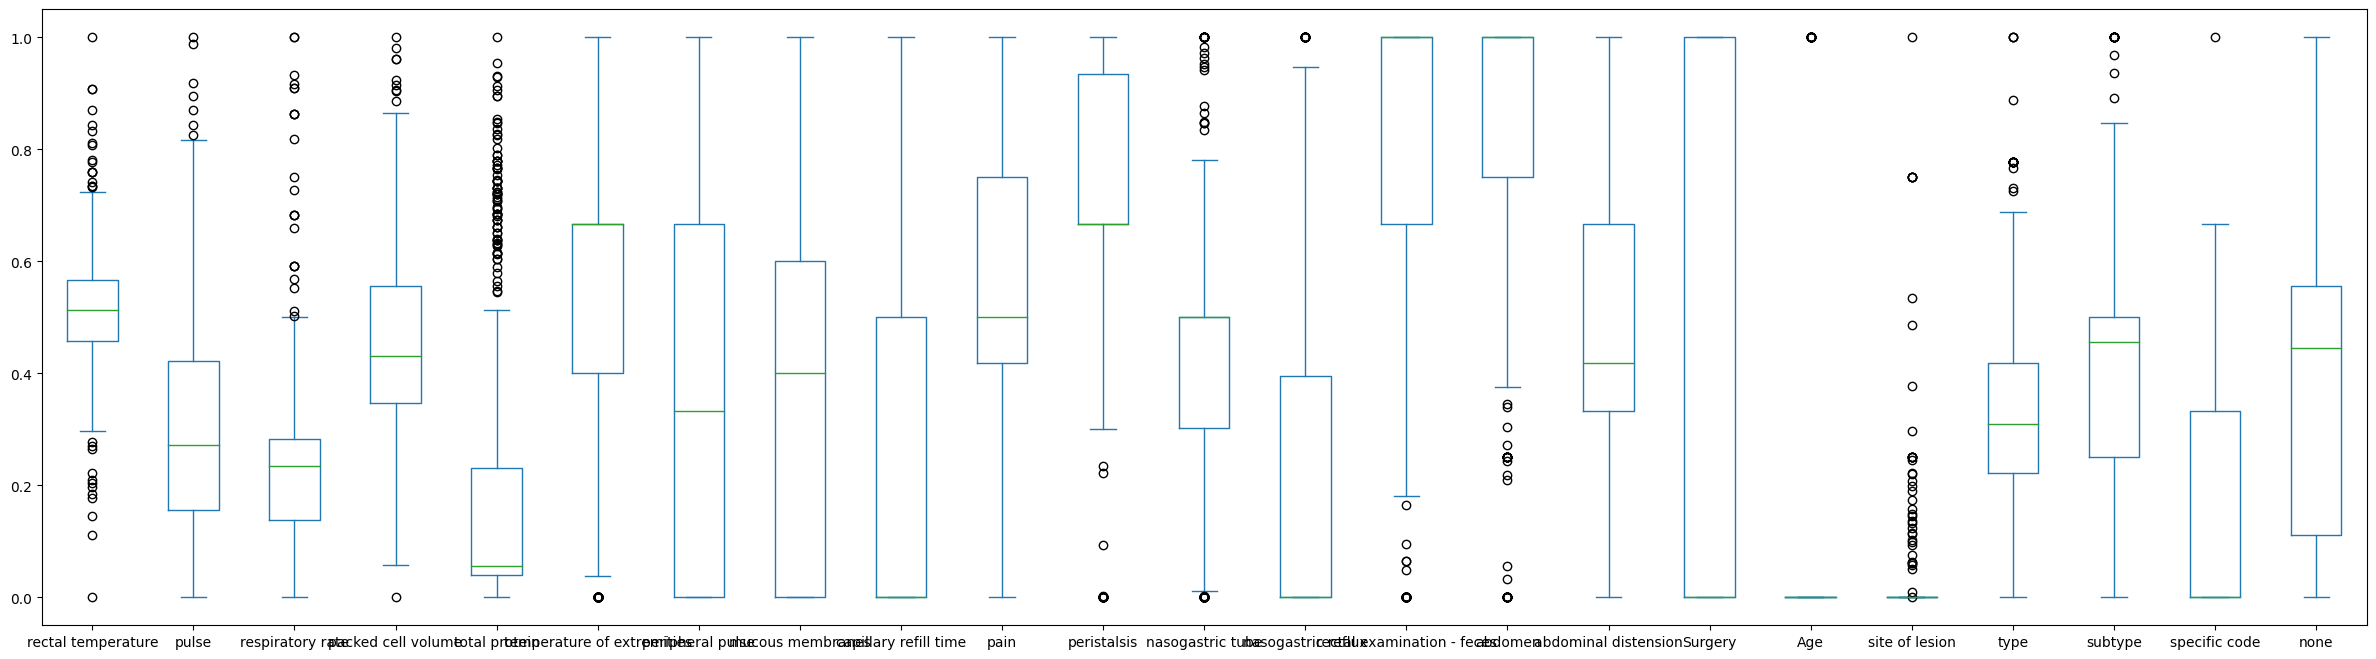

In [ ]:
df_minmax[scale_columns].plot(kind="box", figsize=(30,8));

##### Standard Normalization

In [ ]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_train[scale_columns])
df_standard = df_train.copy()
df_standard[scale_columns] = standard_scaler.transform(df_train[scale_columns])
display.display(df_standard)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,abdomen,abdominal distension,Surgery,Age,site of lesion,type,subtype,specific code,none,outcome
0,-0.401350,0.378093,-0.406132,-1.087279,1.419162,-1.941216,-1.036734,-0.509976,-0.803219,-1.091416,...,-2.688923,-1.674002,1.297683,-0.26389,-0.251417,-1.511833,-1.718260,-0.682080,-1.260133,0
1,0.008337,-0.597776,-0.683956,-0.184855,0.034611,1.606473,0.978733,0.774966,1.372258,1.681706,...,0.609037,-0.260386,-0.848106,-0.26389,-0.251417,0.110199,0.455708,-0.682080,0.543755,2
2,0.008337,-0.876596,-0.961779,0.853331,-0.636591,-1.941216,-1.036734,0.132495,-0.803219,-0.167042,...,0.609037,-0.260386,1.297683,-0.26389,-0.251417,-0.430478,-0.631276,2.741779,0.182977,0
3,0.957523,-0.946301,-1.100691,-0.979468,1.503414,-1.941216,-1.036734,-1.152446,-0.803219,-0.167042,...,0.609037,-1.674002,-0.848106,-0.26389,-0.251417,0.110199,-0.631276,1.029849,-0.899355,0
4,-0.552336,-0.179546,0.030961,0.961143,2.430188,0.423910,0.978733,-1.152446,-0.803219,1.681706,...,-2.688923,-1.674002,-0.848106,-0.26389,-0.251417,0.110199,-0.631276,1.029849,-0.899355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.504565,0.796323,0.030961,-0.184855,0.034611,0.423910,0.978733,1.417437,1.372258,0.757332,...,0.609037,1.710713,1.297683,-0.26389,-0.251417,-0.254694,-0.631276,1.786020,-0.421282,2
380,-0.392126,-1.417873,-0.929173,-1.099932,2.155284,0.423910,-1.036734,-1.152446,-0.803219,0.648844,...,0.221977,-0.512271,-0.848106,-0.26389,-0.251417,0.300567,-0.631276,1.029849,-0.857013,2
381,0.008337,-0.564891,-0.631528,-0.184855,0.034611,1.383315,0.598400,0.411249,1.372258,1.681706,...,0.609037,0.111574,-0.848106,-0.26389,-0.251417,0.110199,0.455708,-0.682080,0.543755,2
382,0.567777,-0.482100,-0.484586,-0.184855,-0.158442,1.276690,0.978733,0.774966,1.372258,1.166143,...,0.609037,-0.025336,-0.249707,-0.26389,-0.251417,0.260978,0.455708,-0.682080,0.543755,2


In [ ]:
correlations = df_standard.corr(method='pearson')
display.display(correlations)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,abdomen,abdominal distension,Surgery,Age,site of lesion,type,subtype,specific code,none,outcome
rectal temperature,1.000000,0.251994,0.273166,0.050265,-0.107828,0.037348,0.127012,-0.036437,0.200028,-0.047967,...,0.028515,0.144994,0.078146,0.167697,0.000721,0.129767,-0.003948,0.044063,-0.138966,-0.028598
pulse,0.251994,1.000000,0.410028,0.314505,-0.121301,0.217247,0.390575,0.400661,0.355837,0.248014,...,0.158990,0.362221,-0.083718,0.507741,-0.053811,0.345181,0.257054,-0.028121,0.165838,0.284153
respiratory rate,0.273166,0.410028,1.000000,0.061381,-0.050796,0.028558,0.105090,0.018592,0.047894,0.081815,...,0.068234,0.167302,-0.199319,0.446350,0.028810,0.196998,0.131205,-0.008966,0.034781,-0.012931
packed cell volume,0.050265,0.314505,0.061381,1.000000,-0.148081,0.314718,0.392434,0.555093,0.486210,0.213625,...,0.030618,0.142640,-0.009887,-0.169801,-0.135683,0.220889,0.393602,-0.190155,0.132695,0.253948
total protein,-0.107828,-0.121301,-0.050796,-0.148081,1.000000,0.061692,-0.091285,-0.112865,-0.185295,-0.057282,...,-0.054790,-0.039423,-0.157740,-0.128442,-0.121944,-0.177034,-0.225013,-0.102458,0.017943,0.087592
temperature of extremities,0.037348,0.217247,0.028558,0.314718,0.061692,1.000000,0.471361,0.268755,0.362854,0.356744,...,0.200997,0.308297,-0.106765,-0.076649,-0.096210,0.224027,0.321562,-0.033584,0.294380,0.474178
peripheral pulse,0.127012,0.390575,0.105090,0.392434,-0.091285,0.471361,1.000000,0.439800,0.461556,0.299465,...,0.146524,0.412438,0.003111,-0.112950,0.052379,0.220002,0.315113,0.020559,0.143855,0.400374
mucous membranes,-0.036437,0.400661,0.018592,0.555093,-0.112865,0.268755,0.439800,1.000000,0.521533,0.403127,...,0.087886,0.256081,-0.041347,-0.081790,-0.161000,0.193275,0.311232,-0.133497,0.287633,0.336297
capillary refill time,0.200028,0.355837,0.047894,0.486210,-0.185295,0.362854,0.461556,0.521533,1.000000,0.373163,...,0.152524,0.252541,0.109848,-0.103746,-0.036412,0.196602,0.259844,-0.048600,0.160952,0.400868
pain,-0.047967,0.248014,0.081815,0.213625,-0.057282,0.356744,0.299465,0.403127,0.373163,1.000000,...,0.341449,0.461451,-0.344151,0.003197,0.047867,0.159293,0.308265,-0.050544,0.395284,0.378703


In [ ]:
standard_scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['rectal temperature', 'pulse', 'respiratory rate',
        'packed cell volume', 'total protein',
        'temperature of extremities', 'peripheral pulse',
        'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
        'nasogastric tube', 'nasogastric reflux',
        'rectal examination - feces', 'abdomen', 'abdominal distension',
        'Surgery', 'Age', 'site of lesion', 'type', 'subtype',
        'specific code', 'none'], dtype=object),
 'n_features_in_': 23,
 'n_samples_seen_': 384,
 'mean_': array([38.16581949, 77.15160359, 29.84733813, 47.08498298, 22.31155599,
         2.64153296,  2.02877801,  2.7937726 ,  1.36921516,  3.1807083 ,
         3.10655669,  1.86428687,  1.39746863,  3.25781061,  4.26131626,
         2.48373105,  1.39524201,  1.06510417,  0.1161292 ,  2.79618349,
         1.58075912,  0.3984275 ,  3.49282532]),
 'var_': array([4.38659676e-01, 8.23252062e+02, 2.07

In [ ]:
# Save encoders
joblib.dump(standard_scaler, f'{save_dir}/standard_scaler.joblib')

['../exps/feature1/standard_scaler.joblib']

## **Biến đổi dữ liệu (Data Transform)**

### Lưu dữ liệu Features

In [ ]:
# MinMax
x_train = df_minmax.values[:, :-1]
y_train = df_minmax.values[:, -1]
display.display(df_minmax.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{save_dir}/feat_minmax.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{save_dir}/df_minmax.xlsx', index=False)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,abdomen,abdominal distension,Surgery,Age,site of lesion,type,subtype,specific code,none,outcome
0,0.462963,0.376623,0.181818,0.269231,0.614936,0.000000,0.000000,0.2,0.0,0.25,...,0.0,0.000000,1.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0
1,0.513211,0.194805,0.136364,0.430199,0.231425,1.000000,0.666667,0.6,0.5,1.00,...,1.0,0.417647,0.0,0.0,0.0,0.333333,0.50,0.000000,0.555556,2
2,0.513211,0.142857,0.090909,0.615385,0.045508,0.000000,0.000000,0.4,0.0,0.50,...,1.0,0.417647,1.0,0.0,0.0,0.222222,0.25,0.666667,0.444444,0
3,0.629630,0.129870,0.068182,0.288462,0.638273,0.000000,0.000000,0.0,0.0,0.50,...,1.0,0.000000,0.0,0.0,0.0,0.333333,0.25,0.333333,0.111111,0
4,0.444444,0.272727,0.253331,0.634615,0.894982,0.666667,0.666667,0.0,0.0,1.00,...,0.0,0.000000,0.0,0.0,0.0,0.333333,0.25,0.333333,0.111111,0


+ x_train: 
  [[0.46296296 0.37662338 0.18181818 0.26923077 0.61493582 0.
  0.         0.2        0.         0.25       0.33333333 0.5
  0.         1.         0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.51321138 0.19480519 0.13636364 0.43019943 0.23142538 1.
  0.66666667 0.6        0.5        1.         1.         0.5
  0.         1.         1.         0.41764706 0.         0.
  0.         0.33333333 0.5        0.         0.55555556]
 [0.51321138 0.14285714 0.09090909 0.61538462 0.04550758 0.
  0.         0.4        0.         0.5        0.66666667 0.5
  1.         1.         1.         0.41764706 1.         0.
  0.         0.22222222 0.25       0.66666667 0.44444444]
 [0.62962963 0.12987013 0.06818182 0.28846154 0.63827305 0.
  0.         0.         0.         0.5        0.         0.
  0.         0.66666667 1.         0.         0.         0.
  0.         0.33333333 0.25       0.33333333 0.11111111]
 [0.44444444 0.27272727 0.25333

In [ ]:
# MinMax
x_train = df_standard.values[:, :-1]
y_train = df_standard.values[:, -1]
display.display(df_standard.head())

print("+ x_train: \n ", x_train[:5, :])
print("+ y_train: \n ", y_train[:5])

np.savez(f'{save_dir}/feat_standard.npz', x_train = x_train, y_train = y_train)
df_minmax.to_excel(f'{save_dir}/df_standard.xlsx', index=False)

,rectal temperature,pulse,respiratory rate,packed cell volume,total protein,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,...,abdomen,abdominal distension,Surgery,Age,site of lesion,type,subtype,specific code,none,outcome
0,-0.401350,0.378093,-0.406132,-1.087279,1.419162,-1.941216,-1.036734,-0.509976,-0.803219,-1.091416,...,-2.688923,-1.674002,1.297683,-0.26389,-0.251417,-1.511833,-1.718260,-0.682080,-1.260133,0
1,0.008337,-0.597776,-0.683956,-0.184855,0.034611,1.606473,0.978733,0.774966,1.372258,1.681706,...,0.609037,-0.260386,-0.848106,-0.26389,-0.251417,0.110199,0.455708,-0.682080,0.543755,2
2,0.008337,-0.876596,-0.961779,0.853331,-0.636591,-1.941216,-1.036734,0.132495,-0.803219,-0.167042,...,0.609037,-0.260386,1.297683,-0.26389,-0.251417,-0.430478,-0.631276,2.741779,0.182977,0
3,0.957523,-0.946301,-1.100691,-0.979468,1.503414,-1.941216,-1.036734,-1.152446,-0.803219,-0.167042,...,0.609037,-1.674002,-0.848106,-0.26389,-0.251417,0.110199,-0.631276,1.029849,-0.899355,0
4,-0.552336,-0.179546,0.030961,0.961143,2.430188,0.423910,0.978733,-1.152446,-0.803219,1.681706,...,-2.688923,-1.674002,-0.848106,-0.26389,-0.251417,0.110199,-0.631276,1.029849,-0.899355,0


+ x_train: 
  [[-0.40134972  0.37809343 -0.4061321  -1.08727922  1.4191619  -1.9412159
  -1.03673432 -0.50997569 -0.80321892 -1.09141635 -1.37586929  0.2707922
  -0.61632961  0.70019149 -2.68892305 -1.67400243  1.29768295 -0.26388991
  -0.25141713 -1.5118332  -1.71826044 -0.68207965 -1.26013292]
 [ 0.0083374  -0.59777578 -0.68395568 -0.18485531  0.03461074  1.60647266
   0.97873318  0.77496583  1.3722576   1.68170639  1.11088861  0.2707922
  -0.61632961  0.70019149  0.60903745 -0.26038601 -0.8481059  -0.26388991
  -0.25141713  0.11019898  0.45570827 -0.68207965  0.54375477]
 [ 0.0083374  -0.87659556 -0.96177926  0.85333149 -0.63659053 -1.9412159
  -1.03673432  0.13249507 -0.80321892 -0.1670421  -0.13249034  0.2707922
   2.48494461  0.70019149  0.60903745 -0.26038601  1.29768295 -0.26388991
  -0.25141713 -0.43047841 -0.63127608  2.7417786   0.18297723]
 [ 0.9575226  -0.9463005  -1.10069105 -0.97946752  1.50341405 -1.9412159
  -1.03673432 -1.15244644 -0.80321892 -0.1670421  -2.61924823 -

In [ ]:
joblib.load(f'{save_dir}/standard_scaler.joblib').__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'feature_names_in_': array(['rectal temperature', 'pulse', 'respiratory rate',
        'packed cell volume', 'total protein',
        'temperature of extremities', 'peripheral pulse',
        'mucous membranes', 'capillary refill time', 'pain', 'peristalsis',
        'nasogastric tube', 'nasogastric reflux',
        'rectal examination - feces', 'abdomen', 'abdominal distension',
        'Surgery', 'Age', 'site of lesion', 'type', 'subtype',
        'specific code', 'none'], dtype=object),
 'n_features_in_': 23,
 'n_samples_seen_': 384,
 'mean_': array([38.16581949, 77.15160359, 29.84733813, 47.08498298, 22.31155599,
         2.64153296,  2.02877801,  2.7937726 ,  1.36921516,  3.1807083 ,
         3.10655669,  1.86428687,  1.39746863,  3.25781061,  4.26131626,
         2.48373105,  1.39524201,  1.06510417,  0.1161292 ,  2.79618349,
         1.58075912,  0.3984275 ,  3.49282532]),
 'var_': array([4.38659676e-01, 8.23252062e+02, 2.07